# WEB-API(Application Programming Interface)
- 웹서비스의 정보를 웹사이트를 통해 제공 : 크롤링으로 수집(비공식 수집)
- 웹API : AIP 정보로 수집(공식적으로 수집)

## 공공데이터 포털
1. 공공데이터 포털 가입 https://www.data.go.kr
2. 앱 ID 등록(개발자 계정)
- 각 서비스 별로 신청

## 출입국관광통계서비스
- 사이트에서 검색 후 활용 신청
- 출입국관광통계조회

## 관광자원통계서비스
- 전국 유료 관광지 입장객 정보 수집

In [1]:
import requests
import os
import sys
import datetime
import time

In [2]:
#pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

### endpoint
- http://openapi.tour.go.kr/openapi/service 는 공통 endpoint
- 문서에 있는 오퍼레이션 명을 확인하여 원하는 주소 확인

In [3]:
# 중국 : 112 / 일본 : 130 / 미국 : 275
url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
serviceKey = 'lg%2BwPhMeEjyYL6esKsQyaf8EGOFrJ0qfss5guvYbipJVC1e9KLfW7M92%2BF7EtBgwZf%2FcVV7PR57T%2FQtMBarUTA%3D%3D'
serviceKey = requests.utils.unquote(serviceKey) # requests의 디코딩 하는 기능

params = {
    '_type' : 'json', # json을 지원하는 경우 _type을 붙어야됨.
    'serviceKey' : serviceKey,
    'YM' : '202004',
    'NAT_CD' : '112',
    'ED_CD' : 'E'
}
response = requests.get(url, params=params)
response.status_code

200

In [4]:
# 사이트에서 주는 serviceKey와 response.url의 Key값이 다르다
# 공공데이터 포털의 키는 1시간 이후에 정상작동됨
# response.url
response.text

'{"response":{"header":{"resultCode":"0000","resultMsg":"OK"},"body":{"items":{"item":{"ed":"방한외래관광객","edCd":"E","natCd":112,"natKorNm":"중  국","num":3935,"rnum":1,"ym":202004}},"numOfRows":10,"pageNo":1,"totalCount":1}}}'

In [8]:
def get_request_url(ym, nat_cd, ed_cd='E'):
    try:
        url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
        serviceKey = 'lg%2BwPhMeEjyYL6esKsQyaf8EGOFrJ0qfss5guvYbipJVC1e9KLfW7M92%2BF7EtBgwZf%2FcVV7PR57T%2FQtMBarUTA%3D%3D'
        serviceKey = requests.utils.unquote(serviceKey) # requests의 디코딩 하는 기능

        params = {
            '_type' : 'json', # json을 지원하는 경우 _type을 붙어야됨.
            'serviceKey' : serviceKey,
            'YM' : ym,
            'NAT_CD' : nat_cd,
            'ED_CD' : ed_cd
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            rs_str = '{} Url Request Success'
            print(rs_str.format(datetime.datetime.now()))
            return response.json()
        else:
            print('status_code : '+response.status_code)
            return None
        
    except Exception as e:
        print(e)
        return None

In [9]:
ym = '202004'
nat_cd = '112'
response = get_request_url(ym, nat_cd, ed_cd='E')
response

2020-06-11 14:36:35.555986 Url Request Success


{'response': {'header': {'resultCode': '0000', 'resultMsg': 'OK'},
  'body': {'items': {'item': {'ed': '방한외래관광객',
     'edCd': 'E',
     'natCd': 112,
     'natKorNm': '중  국',
     'num': 3935,
     'rnum': 1,
     'ym': 202004}},
   'numOfRows': 10,
   'pageNo': 1,
   'totalCount': 1}}}

In [14]:
#def main():
jsonResult = []
# 중국 : 112 / 일본 : 130 / 미국 : 275
nStartYear = 2005
nEndYear = 2020
nat_cd = '275'
for year in range(nStartYear, nEndYear):
    for month in range(1, 13):
        ym = '{0}{1:0>2}'.format(str(year), str(month))
        #print(ym)
        response = get_request_url(ym, nat_cd, ed_cd='E')
        check = response['response']['header']['resultMsg']
        if(check == 'OK'):
            natKorNm = response['response']['body']['items']['item']['natKorNm']
            num = response['response']['body']['items']['item']['num']
            item = {
                'nat-name': natKorNm,
                'nat_cd' : nat_cd,
                'yyyymm' : ym,
                'visit_cnt' : num
                   }
            jsonResult.append(item)

2020-06-11 15:10:28.270967 Url Request Success
2020-06-11 15:10:28.317832 Url Request Success
2020-06-11 15:10:28.364696 Url Request Success
2020-06-11 15:10:28.395938 Url Request Success
2020-06-11 15:10:28.442804 Url Request Success
2020-06-11 15:10:28.474056 Url Request Success
2020-06-11 15:10:28.531002 Url Request Success
2020-06-11 15:10:28.557449 Url Request Success
2020-06-11 15:10:28.588729 Url Request Success
2020-06-11 15:10:28.635578 Url Request Success
2020-06-11 15:10:28.682422 Url Request Success
2020-06-11 15:10:28.713667 Url Request Success
2020-06-11 15:10:28.768715 Url Request Success
2020-06-11 15:10:28.790848 Url Request Success
2020-06-11 15:10:28.837733 Url Request Success
2020-06-11 15:10:28.884597 Url Request Success
2020-06-11 15:10:28.915840 Url Request Success
2020-06-11 15:10:28.967746 Url Request Success
2020-06-11 15:10:29.011739 Url Request Success
2020-06-11 15:10:29.055673 Url Request Success
2020-06-11 15:10:29.088710 Url Request Success
2020-06-11 15

2020-06-11 15:10:37.921455 Url Request Success
2020-06-11 15:10:37.960350 Url Request Success
2020-06-11 15:10:37.989361 Url Request Success
2020-06-11 15:10:38.004982 Url Request Success
2020-06-11 15:10:38.051845 Url Request Success


In [15]:
len(jsonResult)

180

### json 파일로 저장

In [16]:
import json

In [17]:
fn = '해외방문객정보.json'
with open(fn, 'w', encoding='utf-8') as outfile:
    retJson = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
    outfile.write(retJson)

### 그래프로 시각화 하기

In [18]:
cnVisit = []
visitYM = []
index = [] # 변수값
i = 0
for item in jsonResult:
    index.append(i)
    cnVisit.append(item['visit_cnt'])
    visitYM.append(item['yyyymm'])
    i += 1

In [19]:
cnVisit[0], visitYM[0], index[0]

(34769, '200501', 0)

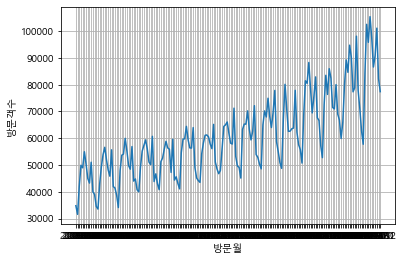

In [20]:
# 한글폰트설정
font_loca = 'c:/windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_loca).get_name()  
matplotlib.rc('font', family=font_name)

plt.xticks(index, visitYM) # x 변수값
plt.plot(index, cnVisit) # y 변수값
plt.xlabel('방문월') # x 변수명
plt.ylabel('방문객수') # y 변수명
plt.grid(True) # 선 생기게 만듬
plt.show()

## 관광자원통계서비스
- 사이트에서 검색 후 활용 신청
- 출입국관광통계조회

### 전국 유료 관광지 입장객 정보 수집
- YM : 년월 201901
- SIDO : 시도 서울특별시
- GUNGU : 시군구 중구
- RES_NM : 관광지명 경복궁
- pageNo : 페이지 번호
- numOfRow : 조회 자료 수 (Max: 100)

In [21]:
def get_request_url2(ym, sido, gungu, res_nm):
    try:
        url = 'http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList'
        serviceKey = 'lg%2BwPhMeEjyYL6esKsQyaf8EGOFrJ0qfss5guvYbipJVC1e9KLfW7M92%2BF7EtBgwZf%2FcVV7PR57T%2FQtMBarUTA%3D%3D'
        serviceKey = requests.utils.unquote(serviceKey) # requests의 디코딩 하는 기능

        params = {
            '_type' : 'json', # json을 지원하는 경우 _type을 붙어야됨.
            'serviceKey' : serviceKey,
            'YM' : ym,
            'SIDO' : sido,
            'GUNGU' : gungu,
            'RES_NM' : res_nm
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            rs_str = '{} Url Request Success'
            print(rs_str.format(datetime.datetime.now()))
            return response.json()
        else:
            print('status_code : '+response.status_code)
            return None
        
    except Exception as e:
        print(e)
        return None

In [22]:
ym = '201201'
sido = '부산광역시'
gungu = '해운대구'
res_nm = '부산시립미술관'
response = get_request_url2(ym, sido, gungu, res_nm)
response

2020-06-11 15:53:41.271283 Url Request Success


{'response': {'header': {'resultCode': '0000', 'resultMsg': 'OK'},
  'body': {'items': {'item': {'addrCd': 2635,
     'csForCnt': 286,
     'csNatCnt': 9110,
     'gungu': '해운대구',
     'resNm': '부산시립미술관',
     'rnum': 1,
     'sido': '부산광역시',
     'ym': 201201}},
   'numOfRows': 10,
   'pageNo': 1,
   'totalCount': 1}}}